<a href="https://colab.research.google.com/github/mertemreozturk/Design-Project/blob/main/last_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id 1uXpFvLUe8SB2Ps4qLj8LUP-U4vCqnlhq -O data1 #okay
# !gdown --id 1Qj2KluVW3V2u6w5sXk0APN594JgXgdbS -O data2 #okay


Downloading...
From: https://drive.google.com/uc?id=1uXpFvLUe8SB2Ps4qLj8LUP-U4vCqnlhq
To: /content/data1
100% 1.96G/1.96G [00:14<00:00, 132MB/s] 


In [2]:
! unzip /content/data1
# ! unzip /content/data2


  


Archive:  /content/data1
  inflating: nonviolent-0.npy        
  inflating: nonviolent-1.npy        
  inflating: nonviolent-10.npy       
  inflating: nonviolent-11.npy       
  inflating: nonviolent-12.npy       
  inflating: nonviolent-13.npy       
  inflating: nonviolent-14.npy       
  inflating: nonviolent-15.npy       
  inflating: nonviolent-18.npy       
  inflating: nonviolent-19.npy       
  inflating: nonviolent-2.npy        
  inflating: nonviolent-20.npy       
  inflating: nonviolent-22.npy       
  inflating: nonviolent-23.npy       
  inflating: nonviolent-25.npy       
  inflating: nonviolent-27.npy       
  inflating: nonviolent-28.npy       
  inflating: nonviolent-29.npy       
  inflating: nonviolent-30.npy       
  inflating: nonviolent-31.npy       
  inflating: nonviolent-32.npy       
  inflating: nonviolent-33.npy       
  inflating: nonviolent-34.npy       
  inflating: nonviolent-35.npy       
  inflating: nonviolent-36.npy       
  inflating: nonviolent-3

In [3]:
from imutils import paths
import os
import shutil
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.optimizers import SGD # optimizer
from keras import metrics


In [4]:

def read_npy_file(npy_file):
    filepath = npy_file.decode() # npy_file is given as byte string here, so decode it to regular str
    data = np.load(filepath)
    # data.flatten().reshape([100,224,224,3])

    label = [1,0]
    if 'nonviolent' in filepath:
      label = [0,1]

    return data.astype(np.float32), label

def read_input_and_label(npy_file):
    input, label = tuple(tf.compat.v1.py_func(read_npy_file, [npy_file], [tf.float32, tf.int64]))
    input.set_shape([100,224,224,3])
    label.set_shape([2,])
    return input, label



In [7]:
BATCH_SIZE = 4
test_dataset = 1
dataset = tf.data.Dataset.list_files('/content/*.npy')
dataset = dataset.map(read_input_and_label)
dataset = dataset.cache() # the above operation might be quite slow, so we cache them
dataset = dataset.batch(BATCH_SIZE)
train_dataset = dataset                          

# test_dataset = dataset.take(test_dataset_size)
# train_dataset = dataset.skip(test_dataset_size)
test_dataset = tf.data.Dataset.list_files('/content/test/*.npy')
test_dataset = test_dataset.map(read_input_and_label)
test_dataset = test_dataset.cache() # the above operation might be quite slow, so we cache them
test_dataset = test_dataset.batch(1) # the above operation might be quite slow, so we cache them


In [9]:
def train_i3d():
    i3d = "https://tfhub.dev/deepmind/i3d-kinetics-400/1"
    hub_layer = hub.KerasLayer(i3d,input_shape=[None,224,224,3],trainable=False)
    
    model = tf.keras.Sequential()   
    
    model.add(hub_layer)
    model.add(tf.keras.layers.Dense(2, activation='softmax')) # change as per no of classes 20-5-21
    opt = SGD(learning_rate=(0.002)) # 2*10^-3
    model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])

    return model 

In [ ]:

import tensorflow_hub as hub
from tensorflow.keras.optimizers import SGD # optimizer
model = train_i3d()
model.summary()


history = model.fit(train_dataset,validation_data = test_dataset, epochs=6, verbose=1,shuffle=False)

loss, acc = model.evaluate(test_dataset, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 400)               12704544  
                                                                 
 dense (Dense)               (None, 2)                 802       
                                                                 
Total params: 12,705,346
Trainable params: 802
Non-trainable params: 12,704,544
_________________________________________________________________
Epoch 1/6
 3/30 [==>...........................] - ETA: 23:00 - loss: 2.3467 - accuracy: 0.3333

In [ ]:
!pip install -q git+https://github.com/tensorflow/docs
import imageio
from IPython import display
from tensorflow_docs.vis import embed

def to_gif(images):
  converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
  imageio.mimsave('./animation.gif', converted_images, fps=25)
  return embed.embed_file('./animation.gif')

In [ ]:
# sample_video = np.load(dataset.take(1))
model_input = tf.constant(test_dataset, dtype=tf.float32)[tf.newaxis, ...]

logits = model(dataset.take(1))
probabilities = tf.nn.softmax(logits)
if(np.argmax(probabilities) == 0):
  print('VIOLENCE!!!!')
else:
  print('Nonviolence')
to_gif(sample_video)

ValueError: ignored

In [ ]:
for i in dataset:
  print(i[0].shape)
  break

(4, 100, 224, 224, 3)



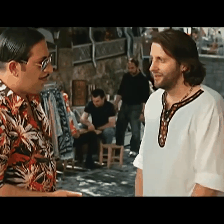

In [ ]:
to_gif(sample_video)

In [ ]:
model.save('./model2-acc1.h5')

In [ ]:
!cp ./model2-acc1.h5 ./drive/MyDrive